In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

In [2]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W

p=200
n_wait=5

In [3]:
sample=200
A_cuts=30
move_cuts=20

In [4]:
alpha_s=np.linspace(0.995, 0.9999, A_cuts)
move_s=np.linspace(10, 250, move_cuts)
move_s=np.insert(move_s, axis=0, obj=0, values=5)
move_s=np.insert(move_s, axis=0, obj=0, values=1)

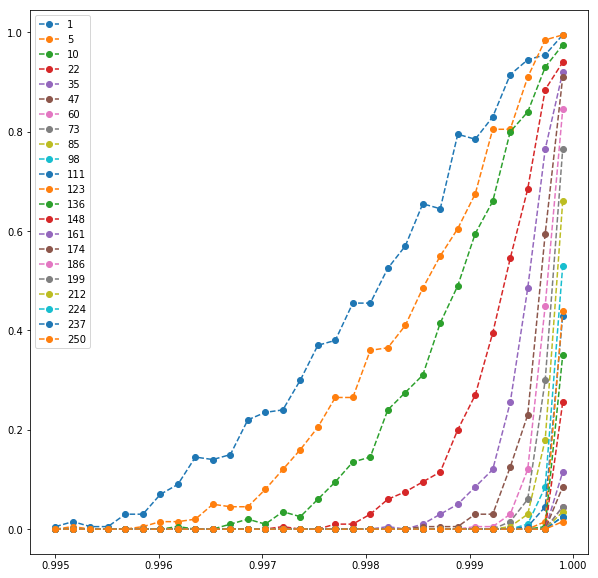

In [5]:
from scipy.signal import savgol_filter

res_all=np.zeros((A_cuts, move_cuts+2))
plt.figure(figsize=(10,10))
for i in range(move_cuts+2):
    res3=np.loadtxt('PT30('+str(int(move_s[i]))+')10_20_8000_q3_A_cor.out', delimiter=',')
    plt.plot(alpha_s, np.mean(res3, axis=1), 'o--', label=str(int(move_s[i])))
    res_all[:, i]=np.mean(res3, axis=1)
    #plt.plot(np.log(1-alpha_s), np.log(-np.log(savgol_filter(np.mean(res3, axis=1), 9, 6))), label=str(int(move_s[i])))
    #plt.plot(alpha_s, savgol_filter(np.mean(res3, axis=1), 9, 6), label=str(int(move_s[i])))
    plt.legend()

#res3=np.loadtxt('PT03(5)11_20_8000_q3_A_cor.out', delimiter=',')
#plt.plot(alpha_s, np.mean(res3, axis=1), 'o--')
plt.show()

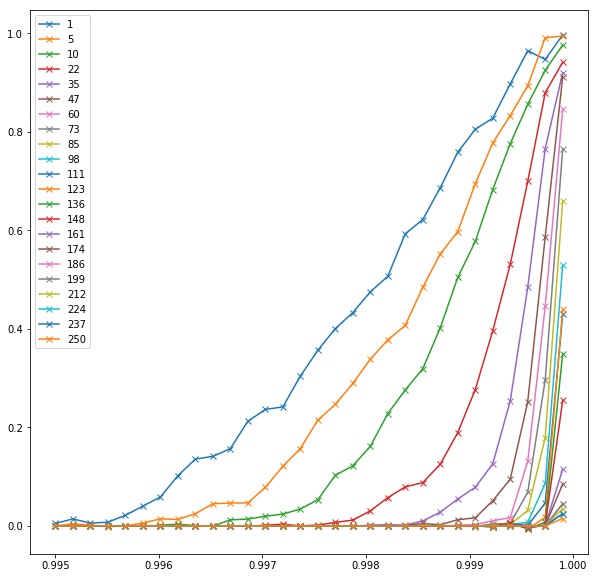

In [6]:
from scipy.signal import savgol_filter

res_all=np.zeros((A_cuts, move_cuts+2))
plt.figure(figsize=(10,10))
for i in range(move_cuts+2):
    res3=np.loadtxt('PT30('+str(int(move_s[i]))+')10_20_8000_q3_A_cor.out', delimiter=',')
    #plt.plot(alpha_s, np.mean(res3, axis=1), 'o--')
    res_all[:, i]=np.mean(res3, axis=1)
    #plt.plot(np.log(1-alpha_s), np.log(-np.log(savgol_filter(np.mean(res3, axis=1), 9, 6))), label=str(int(move_s[i])))
    plt.plot(alpha_s, savgol_filter(np.mean(res3, axis=1), 9, 6), 'x-', label=str(int(move_s[i])))
    plt.legend()
plt.show()

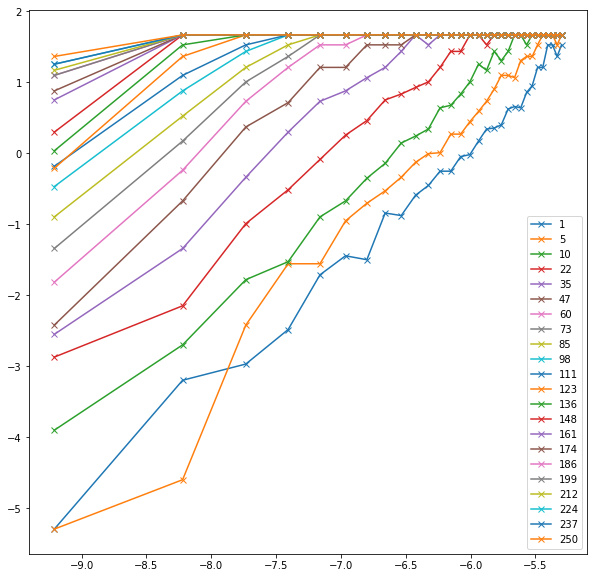

In [9]:
from scipy.signal import savgol_filter

res_all=np.zeros((A_cuts, move_cuts+2))
plt.figure(figsize=(10,10))
for i in range(move_cuts+2):
    res3=np.loadtxt('PT30('+str(int(move_s[i]))+')10_20_8000_q3_A_cor.out', delimiter=',')
    #plt.plot(alpha_s, np.mean(res3, axis=1), 'o--')
    res_all[:, i]=np.mean(res3, axis=1)
    res_all[res_all[:,i]>198/200, i]=198/200
    #plt.plot(np.log(1-alpha_s), savgol_filter(np.log(-np.log(res_all[:, i]+1/200)), 9, 6), 'x-', label=str(int(move_s[i])))
    plt.plot(np.log(1-alpha_s), np.log(-np.log(res_all[:, i]+1/200)), 'x-', label=str(int(move_s[i])))
    #plt.plot(alpha_s, savgol_filter(np.mean(res3, axis=1), 9, 6), label=str(int(move_s[i])))
    plt.legend()

plt.show()

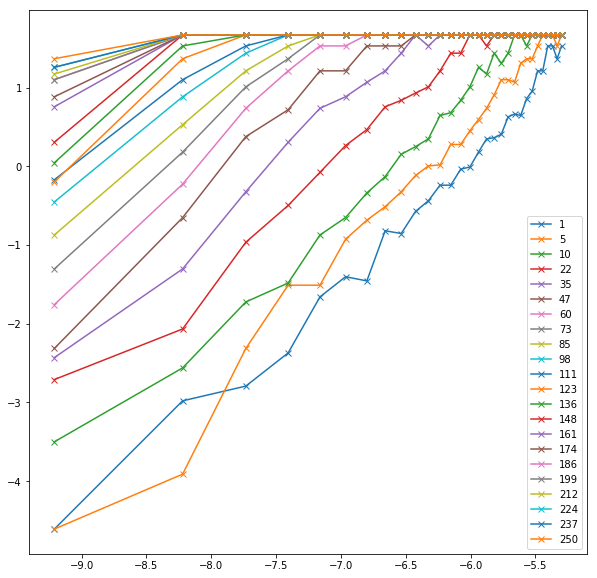

In [12]:
from scipy.signal import savgol_filter

res_all=np.zeros((A_cuts, move_cuts+2))
plt.figure(figsize=(10,10))
for i in range(move_cuts+2):
    res3=np.loadtxt('PT30('+str(int(move_s[i]))+')10_20_8000_q3_A_cor.out', delimiter=',')
    #plt.plot(alpha_s, np.mean(res3, axis=1), 'o--')
    res_all[:, i]=np.mean(res3, axis=1)
    res_all[:, i]=(res_all[:, i]*200+1)/202
    #plt.plot(np.log(1-alpha_s), savgol_filter(np.log(-np.log(res_all[:, i]+1/200)), 9, 6), 'x-', label=str(int(move_s[i])))
    plt.plot(np.log(1-alpha_s), np.log(-np.log(res_all[:, i])), 'x-', label=str(int(move_s[i])))
    #plt.plot(alpha_s, savgol_filter(np.mean(res3, axis=1), 9, 6), label=str(int(move_s[i])))
    plt.legend()

plt.show()

In [13]:
from scipy.signal import savgol_filter
from scipy import stats

res_rval=[]
res_err=[]
res_len=[]
res_pval=[]

res_all=np.zeros((A_cuts, move_cuts+2))

for i in range(move_cuts+2):
    res3=np.loadtxt('PT30('+str(int(move_s[i]))+')10_20_8000_q3_A_cor.out', delimiter=',')
    #plt.plot(alpha_s, np.mean(res3, axis=1), 'o--')
    res_all[:, i]=np.mean(res3, axis=1)
    y=savgol_filter(np.log(-np.log(np.mean(res3, axis=1)+1/200)), 9, 6)
    slope, intercpet, r_value, p_value, std_err=stats.linregress(np.log(1-alpha_s)[y<1.6], y[y<1.6])
    res_rval.append(r_value)
    res_pval.append(p_value)
    res_len.append(y[y<1.6].shape[0])
    res_err.append(std_err)
    #plt.plot(alpha_s, savgol_filter(np.mean(res3, axis=1), 9, 6), label=str(int(move_s[i])))
    #plt.legend()

res_rval=np.array(res_rval)
res_pval=np.array(res_pval)
res_len=np.array(res_len)
res_err=np.array(res_err)

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in less
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less
/usr/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:106: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/usr/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


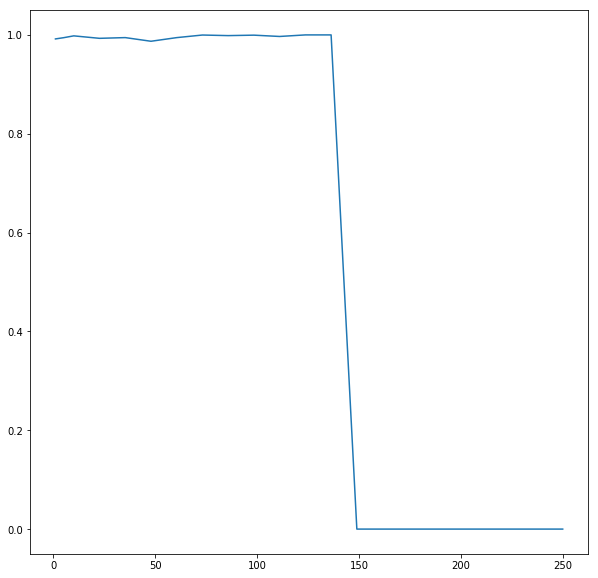

In [14]:
plt.figure(figsize=(10,10))
plt.plot(move_s, res_rval)
plt.show()

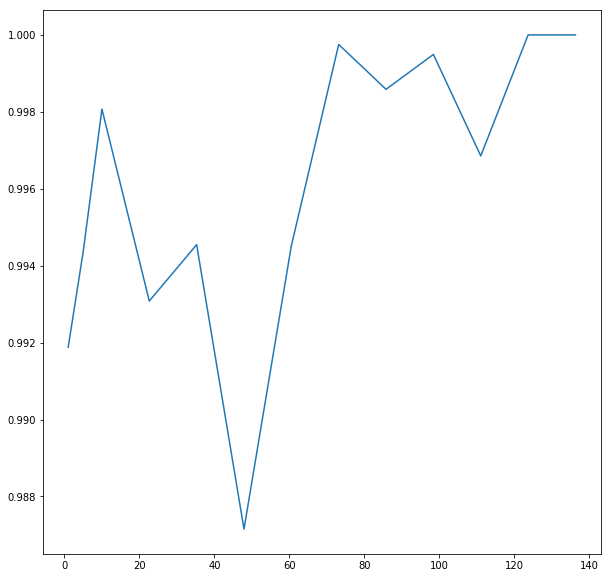

In [15]:
plt.figure(figsize=(10,10))
plt.plot(move_s[move_s<140], res_rval[move_s<140])
plt.show()

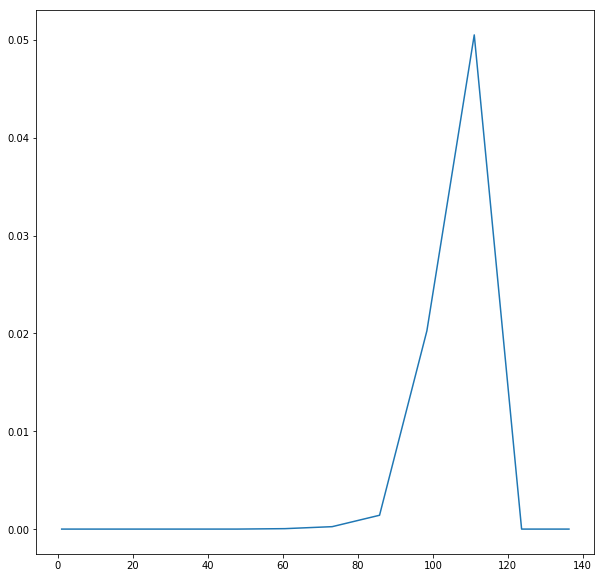

In [16]:
plt.figure(figsize=(10,10))
plt.plot(move_s, res_pval)
plt.show()

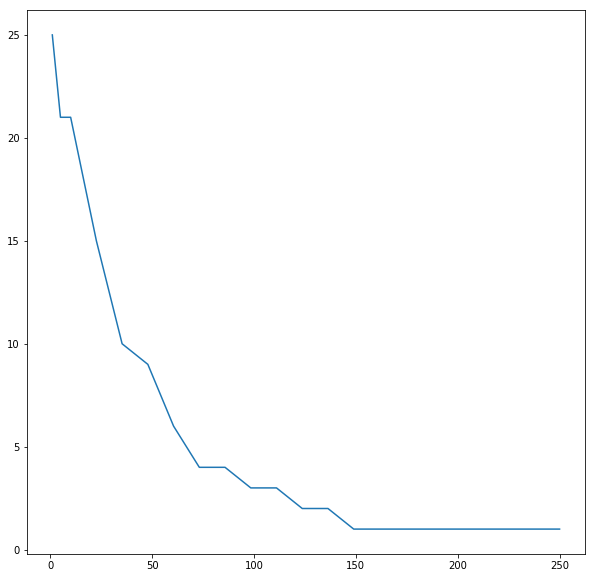

In [17]:
plt.figure(figsize=(10,10))
plt.plot(move_s, res_len)
plt.show()

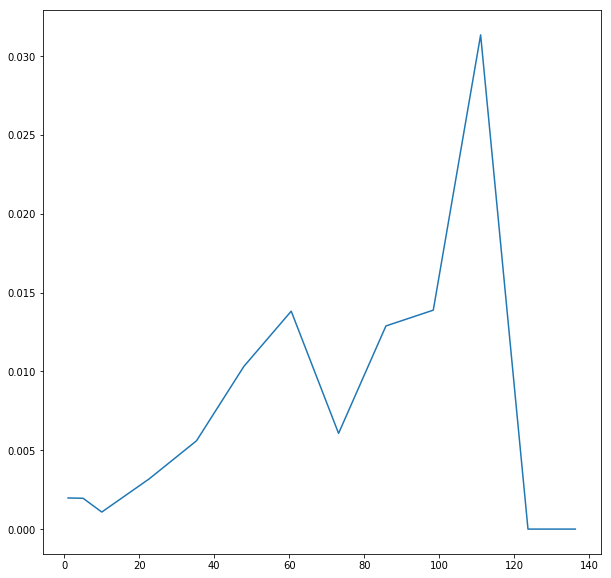

In [18]:
plt.figure(figsize=(10,10))
plt.plot(move_s, np.divide(res_err, res_len))
plt.show()